In [1]:
# Interactive plots
%matplotlib notebook

# https://ipython.org/ipython-doc/3/config/extensions/autoreload.html
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import mypackage
import glob

np.set_printoptions(precision=4)
pd.options.display.max_rows = 4

TensorFlow version is 2.1.0


In [2]:
def load_spectra_db():
    def rename_database_group(substring, type_name):
        items = database[database["Type"].str.contains(substring)].index
        for i, idx in enumerate(items):
            database.loc[idx, "Type"] = f"{type_name}_{i}"
        
    file_name = "SpectralAbsorbtionDatabase.pkl"
    database = pd.read_pickle(file_name)
    database.reset_index(inplace=True)
    database.rename(columns={"index": "Type"}, errors="raise", inplace=True)
    
    # Remove the black plastic glove
    database = database[database["Type"].str.contains("black_latex_glove") != True]
    # Here the order does matter, since some substrings used are contained in more than one groups
    rename_database_group("_fat_", "Fat")
    rename_database_group("chicken_", "Chicken")
    
    rename_database_group("pu_belt", "Plastic_Pu_Belt")
    rename_database_group("blue_belt_roll", "Plastic_Belt")
    rename_database_group("tube", "Plastic_Tube")
    rename_database_group("glove", "Plastic_Glove")
    rename_database_group("liner", "Plastic_Liner")
    rename_database_group("belt", "Plastic_Belt")
    types = database[database["Type"].str.contains("Plastic")]["Type"].str.replace("[0-9()]+$", "")
    plastic_types = dict(enumerate(np.unique(types)))
    
#     plastics = database[database["Type"].str.contains("plastic") &  (database["Type"].str.contains("liner") != True)]
    return database
database = load_spectra_db()
database

,Type,800.43,800.68,800.93,801.17,801.42,801.67,801.92,802.17,802.41,...,2478.6,2481.0,2483.3,2485.7,2488.1,2490.5,2492.9,2495.3,2497.7,2500.1
0,Plastic_Tube_0,1.38810,1.38980,1.41220,1.43610,1.45510,1.41660,1.38990,1.36990,1.38080,...,1.7836,1.7364,1.7186,1.7332,1.7216,1.70260,1.72400,1.76070,1.75660,1.74770
1,Fat_0,0.80156,0.81471,0.82090,0.81225,0.79933,0.79466,0.79840,0.80355,0.81272,...,1.8789,1.9289,1.9613,1.9575,1.9609,1.92980,1.86710,1.85500,1.83040,1.84770
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Plastic_Liner_7,0.82905,0.81139,0.79338,0.79069,0.80060,0.80919,0.81061,0.80750,0.81187,...,1.0943,1.1002,1.1123,1.1064,1.0643,0.99794,0.94007,0.91045,0.90163,0.89998
73,Plastic_Liner_8,0.28886,0.28498,0.28099,0.28096,0.28322,0.28221,0.27875,0.27903,0.28404,...,1.3783,1.3591,1.3683,1.3922,1.3812,1.33500,1.29670,1.26240,1.23240,1.24080


(array(['Plastic_Belt_', 'Plastic_Glove_', 'Plastic_Liner_',
        'Plastic_Pu_Belt_', 'Plastic_Tube_'], dtype=object),
 {0: 'Plastic_Belt_',
  1: 'Plastic_Glove_',
  2: 'Plastic_Liner_',
  3: 'Plastic_Pu_Belt_',
  4: 'Plastic_Tube_'})

### TODO: Use the labels for the TOMRA dataset as the labels for the fake dataset and just fill in the image

In [3]:
labels_path = "../data/tomra/"
_, labels, _ = mypackage.Dataset.load(labels_path, only_with_contaminant=True) # load_labels(labels_path)

In [4]:
labels.shape, np.unique(labels, return_counts=True), np.unique(labels[0], return_counts=True)

((24, 100, 100, 1),
 (array([1, 2, 3], dtype=int32), array([200211,  36685,   3104])),
 (array([1, 2, 3], dtype=int32), array([8587, 1303,  110])))

In [5]:
def generate_image(base_label):
    ''''Generates fake images based in the initialized FakeDataset parameters

        # Where x is the generated image and y is the corresponding label
        returns x, y'''
    # TODO: Fill the x image with randomly selected spectra (with replacement) based on the label
    #             np.random.choice(spectras_of_type, pixels_needed, replace=True)
    y = base_label
    x = 0# TODO:...
    return x, y

def get_images(numb_images):
    X, Y = [], []
    numb_available_labels = len(labels) # 
    selected_labels = np.random.choice(numb_available_labels, numb_images, replace=False)
    for i in selected_labels:
        x, y = generate_image(labels[i])
        X.append(x)
        Y.append(y)
    return np.array(X), np.array(Y)

X, Y = get_images(numb_images=1);

In [6]:
X.shape, Y.shape

((1,), (1, 100, 100, 1))

In [54]:
26*2203

57278

In [73]:
wavelengths = np.array([928, 932, 935, 939, 942, 946, 950, 953, 957, 960, 964, 968, 971, 975, 978, 982, 986, 989, 993, 997, 1000, 1004, 1007, 1011, 1015, 1018, 1022, 1025, 1029, 1033, 1036, 1040, 1043, 1047, 1051, 1054, 1058, 1061, 1065, 1069, 1072, 1076, 1079, 1083, 1087, 1090, 1094, 1097, 1101, 1105, 1108, 1112, 1115, 1119, 1123, 1126, 1130, 1134, 1137, 1141, 1144, 1148, 1152, 1155, 1159, 1162, 1166, 1170, 1173, 1177, 1180, 1184, 1188, 1191, 1195, 1198, 1202, 1206, 1209, 1213, 1216, 1220, 1224, 1227, 1231, 1234, 1238, 1242, 1245, 1249, 1252, 1256, 1260, 1263, 1267, 1271, 1274, 1278, 1281, 1285, 1289, 1292, 1296, 1299, 1303, 1307, 1310, 1314, 1317, 1321, 1325, 1328, 1332, 1335, 1339, 1343, 1346, 1350, 1353, 1357, 1361, 1364, 1368, 1371, 1375, 1379, 1382, 1386, 1390, 1393, 1397, 1400, 1404, 1408, 1411, 1415, 1418, 1422, 1426, 1429, 1433, 1436, 1440, 1444, 1447, 1451, 1454, 1458, 1462, 1465, 1469, 1472, 1476, 1480, 1483, 1487, 1490, 1494, 1498, 1501, 1505, 1508, 1512, 1516, 1519, 1523, 1527, 1530, 1534, 1537, 1541, 1545, 1548, 1552, 1555, 1559, 1563, 1566, 1570, 1573, 1577, 1581, 1584, 1588, 1591, 1595, 1599, 1602, 1606, 1609, 1613, 1617, 1620, 1624, 1627, 1631, 1635, 1638, 1642, 1645, 1649, 1653, 1656, 1660, 1664, 1667, 1671, 1674])
fake_data = mypackage.FakeDataset(wavelengths=wavelengths)
X, Y = fake_data.get_images(1)

/.local/lib/python3.6/site-packages/mypackage/DataManipulation/fake_data.py:26: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if wavelengths == "All":


(8448, 208)
1
(1430, 208)
2
Desired shape (1430, 208)
selected_spectrum.shape (1430, 2203)
len(self.wavelengths) 208
(122, 208)
3
Desired shape (122, 208)
selected_spectrum.shape (122, 2203)
len(self.wavelengths) 208


In [74]:
X.shape, Y.shape

((1, 100, 100, 208), (1, 100, 100, 1))

<IPython.core.display.Javascript object>


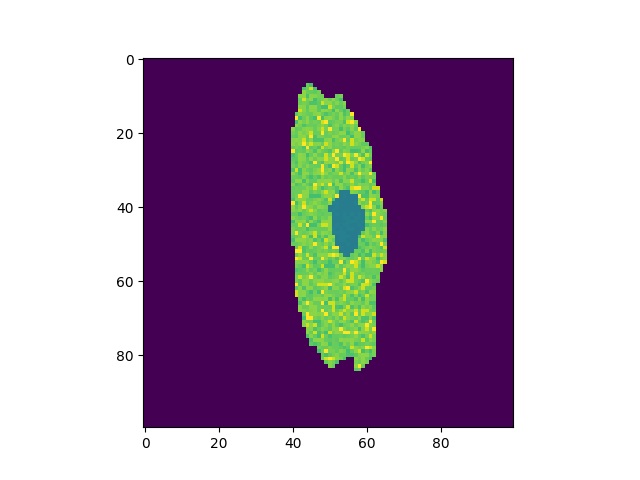

In [75]:
plt.figure()
plt.imshow(X[0, :, :, 4])

<IPython.core.display.Javascript object>


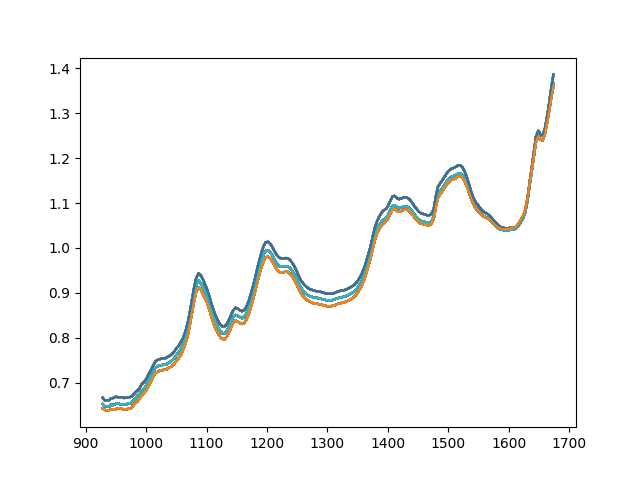

In [79]:
spectra = X[0, np.squeeze(Y) == 3]
plt.figure()
for i in range(len(spectra)):
    plt.plot(wavelengths, spectra[i])

<IPython.core.display.Javascript object>


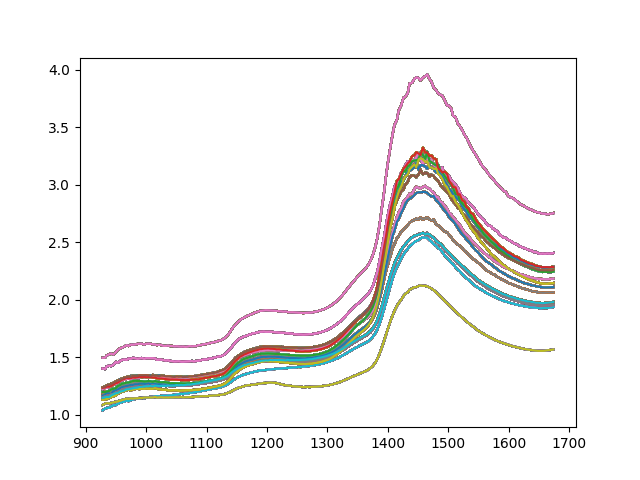

In [78]:
spectra = X[0, np.squeeze(Y) == 2]
plt.figure()
for i in range(len(spectra)):
    plt.plot(wavelengths, spectra[i])

In [38]:
x = np.zeros((100, 100, 208))
y = labels[0]
np.unique(y, return_counts=True)

(array([1, 2, 3], dtype=int32), array([8587, 1303,  110]))

In [39]:
b = np.arange(1, 10).reshape((3, 3))
b = np.zeros((3, 3))
b[1:, 1:] = 1
a = np.zeros((3, 3, 2))
a[b == 1] = np.ones((4, 1))*2
a.shape, b.shape

((3, 3, 2), (3, 3))

In [36]:
np.random.choice(np.arange(1, 11))

6